<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# PCA Lab: Speed Dating

_Authors: Kiefer Katovich (SF)_

---

Let's practice principal component analysis (PCA) using a data set from Kaggle. PCA is often used to simplify data, reduce noise, and find unmeasured latent variables, so it's important to take the time to understand what's going on.

**In this lab, we will:**

- Explore how PCA relates to correlation.
- Use PCA to perform dimensionality reduction.
- Predict whether or not a speed dater likes reading based on the dater's other likes.

---

### Data Set

The data set we're using for this lab is a subset of this [much more detailed speed dating data set](https://www.kaggle.com/annavictoria/speed-dating-experiment). In particular, this contains no information on the actual speed dating itself (i.e., successes with or opinions of other individuals). 

It also contains no follow-up information where individuals are asked the same questions about themselves again. It only contains information about what an individual enjoys doing, their self-ratings on how desirable they are, and how they think others rate them based on desirability.

The columns present in the data are outlined below:

FieldName|Description
---------|-----------
    subject_id                   |   Unique individual identifier.
    wave                         |   Meetup ID.
    like_sports                  |   Enjoyment of participating in sports.
    like_tvsports                |   Enjoyment of watching sports on TV.
    like_exercise                |   Enjoyment of exercise.
    like_food                    |   Enjoyment of food.
    like_museums                 |   Enjoyment of museums.
    like_art                     |   Enjoyment of art.
    like_hiking                  |   Enjoyment of hiking.
    like_gaming                  |   Enjoyment of playing games.
    like_clubbing                |   Enjoyment of going clubbing/partying.
    like_reading                 |   Enjoyment of reading.
    like_tv                      |   Enjoyment of TV in general.
    like_theater                 |   Enjoyment of the theater (plays, musicals, etc.).
    like_movies                  |   Enjoyment of movies.
    like_concerts                |   Enjoyment of concerts.
    like_music                   |   Enjoyment of music.
    like_shopping                |   Enjoyment of shopping.
    like_yoga                    |   Enjoyment of yoga.
    subjective_attractiveness    |   How attractive they rate themselves.
    subjective_sincerity         |   How sincere they rate themselves.
    subjective_intelligence      |   How intelligent they rate themselves.
    subjective_fun               |   How fun they rate themselves.
    subjective_ambition          |   How ambitious they rate themselves.
    objective_attractiveness     |   Perceived rating others would give them on how attractive they are.
    objective_sincerity          |   Perceived rating others would give them on how sincere they are.
    objective_intelligence       |   Perceived rating others would give them on how intelligent they are.
    objective_fun                |   Perceived rating others would give them on how fun they are.
    objective_ambition           |   Perceived rating others would give them on how ambitious they are.
    
There are 551 subjects total.

---

### 1) Load packages.

In [1]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import warnings 
warnings.filterwarnings('ignore')


sns.set_style("whitegrid")

---

### 2) Load and clean the speed dating data.

- First, remove columns with more than 200 missing values.
- Then, remove rows with missing values.
- Verify that no rows contain NaNs.

In [2]:
# Open dataset
sd = pd.read_csv('./datasets/speed_dating.csv')

In [3]:
# Top 5 rows
sd.head()

,subject_id,wave,like_sports,like_tvsports,like_exercise,like_food,like_museums,like_art,like_hiking,like_gaming,...,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition,objective_attractiveness,objective_sincerity,objective_intelligence,objective_fun,objective_ambition
0,1,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2,1,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,...,7.0,5.0,8.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN
2,3,1,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,...,8.0,9.0,9.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN
3,4,1,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,...,7.0,8.0,7.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
4,5,1,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,...,6.0,3.0,10.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check info
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_id                 551 non-null    int64  
 1   wave                       551 non-null    int64  
 2   like_sports                544 non-null    float64
 3   like_tvsports              544 non-null    float64
 4   like_exercise              544 non-null    float64
 5   like_food                  544 non-null    float64
 6   like_museums               544 non-null    float64
 7   like_art                   544 non-null    float64
 8   like_hiking                544 non-null    float64
 9   like_gaming                544 non-null    float64
 10  like_clubbing              544 non-null    float64
 11  like_reading               544 non-null    float64
 12  like_tv                    544 non-null    float64
 13  like_theater               544 non-null    float64

In [5]:
# Check shape
sd.shape

(551, 29)

In [6]:
# Check missing values
sd.isnull().sum() 

subject_id                     0
wave                           0
like_sports                    7
like_tvsports                  7
like_exercise                  7
like_food                      7
like_museums                   7
like_art                       7
like_hiking                    7
like_gaming                    7
like_clubbing                  7
like_reading                   7
like_tv                        7
like_theater                   7
like_movies                    7
like_concerts                  7
like_music                     7
like_shopping                  7
like_yoga                      7
subjective_attractiveness      9
subjective_sincerity           9
subjective_intelligence        9
subjective_fun                 9
subjective_ambition            9
objective_attractiveness     237
objective_sincerity          237
objective_intelligence       237
objective_fun                237
objective_ambition           237
dtype: int64

In [7]:
# Remove columns with more than 200 missing values 
sd.drop(columns=["objective_attractiveness",
                "objective_sincerity",
                "objective_intelligence",
                "objective_fun",
                "objective_ambition"], inplace=True)

In [8]:
# Remove rows with missing values
sd.dropna(inplace=True)

In [9]:
# Recheck missing values
# Verify that no rows contain NaNs
sd.isnull().sum()[sd.isnull().sum() !=0 ] 

Series([], dtype: int64)

---

### 3) Example: Are the `subjective` columns correlated?

Here, we'll understand how the `subjective` columns are correlated.

- Find the z scores of each `subjective` column (i.e. standardize the `subjective` columns).
- Visualize correlation using [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html).
- Visualize correlation using a heat map.

**3.A) Find the z scores of each column. This allows the columns to more easily be directly compared.**

In [10]:
subjective_cols = [col for col in sd.columns \
                   if col.startswith('subjective')]
sc = StandardScaler()

In [11]:
subjective = pd.DataFrame(sc.fit_transform(sd[subjective_cols]), columns=subjective_cols)

In [12]:
subjective

,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,-0.786472,-0.202716,-0.354194,0.193323,-0.323589
1,-0.066425,-2.329267,-0.354194,1.486916,-2.564932
2,0.653622,0.506135,0.564338,0.193323,0.236747
3,-0.066425,-0.202716,-1.272726,0.840119,0.236747
4,-0.786472,-3.746968,1.482870,-1.100270,0.236747
...,...,...,...,...,...
537,2.093717,1.214985,1.482870,1.486916,1.357419
538,-0.066425,1.214985,0.564338,0.193323,0.797083
539,-0.066425,-0.911566,-1.272726,-0.453474,-0.323589
540,-0.066425,-0.202716,-0.354194,-3.040659,-1.444260


**3.B) Use a PairGrid to visualize correlation.**

[`PairGrid`](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) is more general version of `pairplot`.  For example, you could use the following code, where `subjective` is a data frame containing only the subjective columns:

```python
g = sns.PairGrid(subjective)
# Regression plots in lower triangle
g = g.map_lower(sns.regplot) 
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle
g = g.map_diag(plt.hist) # Histograms along diagonal

plt.show()
```

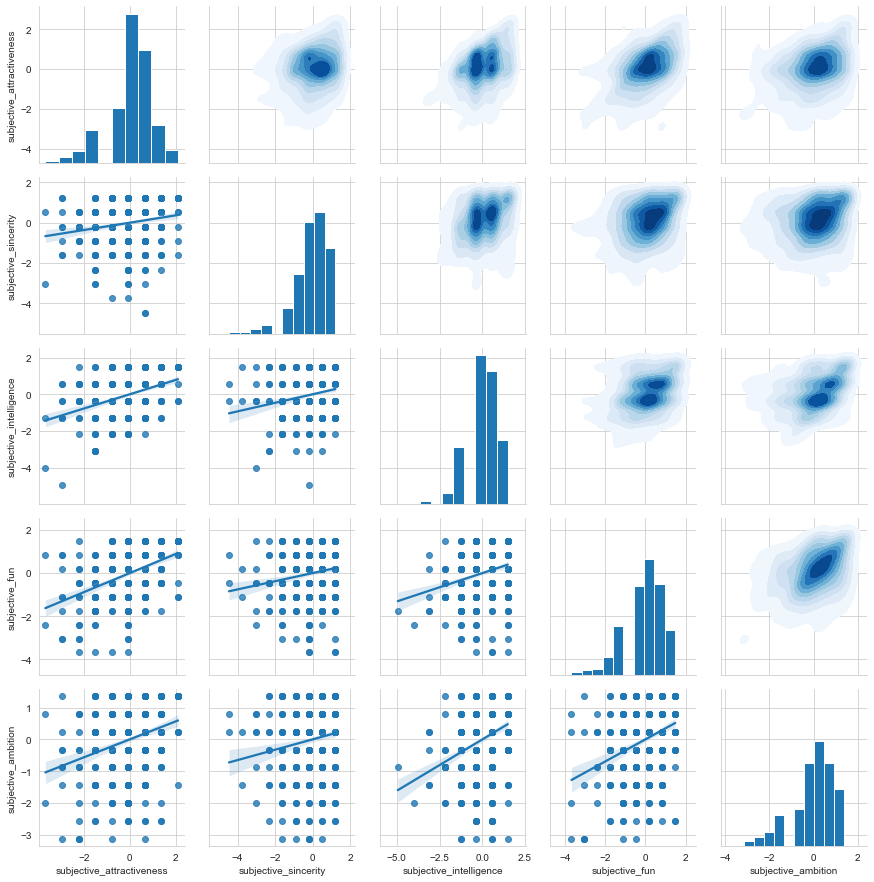

In [13]:
# Visualize correlation using PairGrid.
g = sns.PairGrid(subjective)
# Regression plots in lower triangle
g = g.map_lower(sns.regplot) 
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle
g = g.map_diag(plt.hist) # Histograms along diagonal

plt.show()

**3.C) Use a heat map to visualize correlation.**

<AxesSubplot:>

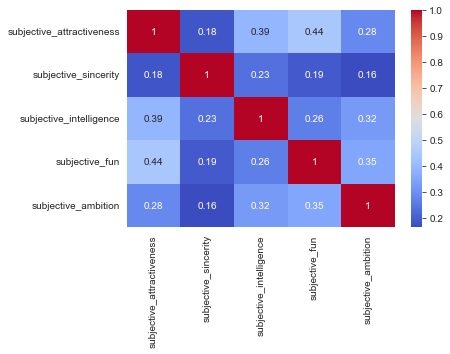

In [14]:
sns.heatmap(subjective.corr(), annot=True,  cmap="coolwarm")

In [15]:
# attractiveness and fun to have a higher correlation than each other.
# attractiveness and intelligence to have a higher correlation.
# ambition and intelligence to have a higher correlation.
# ambition and fun to have a higher correlation.

---

**Important: Did you ensure the results make sense intuitively?** If not, look at the results again. You should **always** interpret your results and ensure they make sense based on what you expected. If they don’t, investigate why — sometimes your analysis or data are wrong.

> For example, the results show that believing you are attractive and fun are correlated. Would you expect that believing you are intellectual and fun to have a higher or lower correlation? What do the results say?

---


### 4) Visualize some preference columns.

Next, we’ll explore how some preference ratings are correlated. You saw an example — now try it on the `preference_cols` below.

- Find the z scores of each column in `preference_cols`.
- Visualize correlation using PairGrid.
- Visualize correlation using a heat map.
- Do these results make sense intuitively? 

In [16]:
preference_cols = ['like_tvsports', 'like_sports', 'like_museums', 
                   'like_theater', 'like_shopping']
sd_like = sd[preference_cols]

**4.A) Find the z scores of each column in `preference_cols`.**

In [17]:
preference = pd.DataFrame(sc.fit_transform(sd[preference_cols]), columns=preference_cols)

In [18]:
preference.head()

,like_tvsports,like_sports,like_museums,like_theater,like_shopping
0,-0.912780,0.992539,-2.935051,-2.560869,0.913254
1,-0.912780,-1.291776,0.497620,0.985579,-1.000836
2,1.230441,-1.291776,-0.973525,0.098967,0.913254
3,-1.269983,-2.053215,-0.483143,0.985579,-1.766472
4,-0.198373,0.231101,-0.483143,-0.344339,0.913254


**4.B) Visualize correlation using PairGrid.**

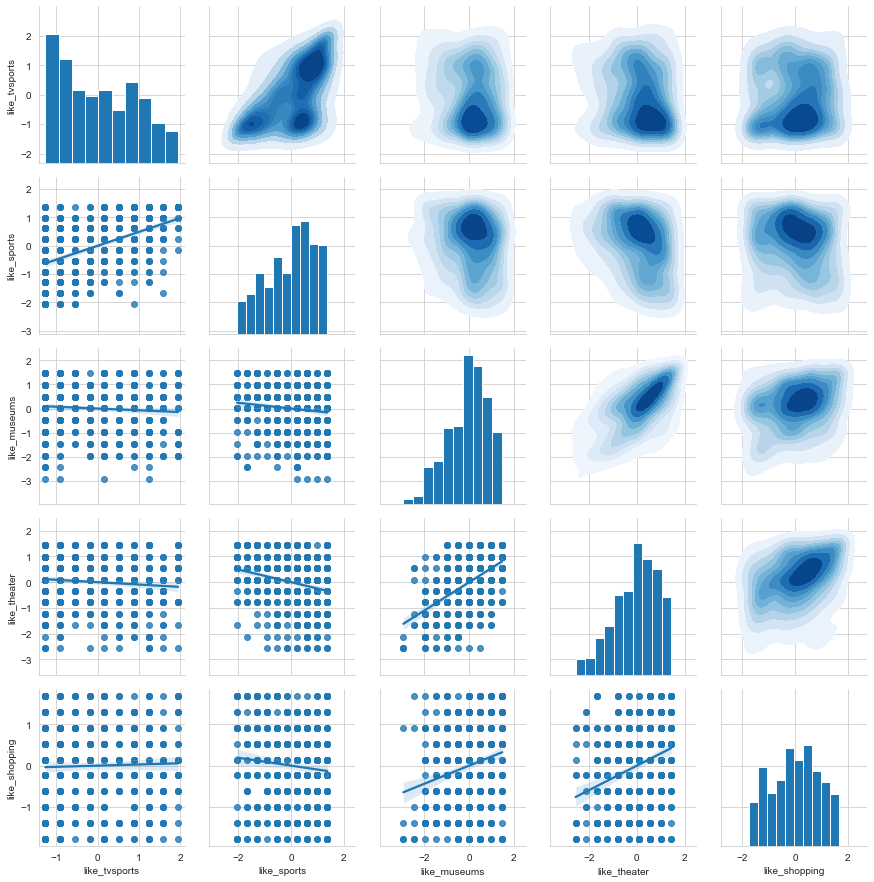

In [19]:
# Visualize correlation using PairGrid.
g = sns.PairGrid(preference)
# Regression plots in lower triangle
g = g.map_lower(sns.regplot) 
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle
g = g.map_diag(plt.hist) # Histograms along diagonal

plt.show()

**4.C) Visualize correlation using a heat map.**

<AxesSubplot:>

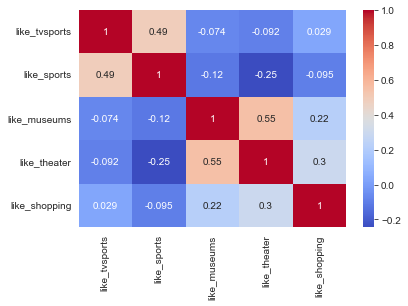

In [20]:
sns.heatmap(preference.corr(), annot=True,  cmap="coolwarm")

In [21]:
# Do these results make sense intuitively? 
# like_museums vs like_theater
# like_sport vs like_tvsports 
# seem likely in same topic sport and travel outside in some place 

---

### 5) Example: Fit PCA on the subjective ratings.

In [22]:
subjective_pca = PCA(n_components=5)
subjective_pca.fit(subjective.values)

PCA(n_components=5)

---

**5.A) Look at the weights of the principal components.**

The principal components (or eigenvectors!) are simply the weights or coefficients on the original variables $X$ that transforms them to $Z$.

In [23]:
subjective_pca.components_
# Principal axes in feature space, 
# representing the directions of maximum variance in the data. 

array([[-0.50189394, -0.31528977, -0.46707122, -0.48386412, -0.44318711],
       [ 0.21825979, -0.90905995, -0.09768977,  0.27400972,  0.20334221],
       [-0.40202351, -0.14438615,  0.42289342, -0.48141404,  0.63791176],
       [ 0.34811874, -0.21377638,  0.64842003, -0.36104737, -0.53132783],
       [-0.64626278, -0.08749096,  0.41594928,  0.57330577, -0.27017855]])

---

**5.B) Look at the explained variance values (aka eigenvalues) and the explained variance ratios.**

The eigenvalues are ordered such that the first components have the largest eigenvalues. The values and their normalized equivalent in the explained variance ratio attribute tell you how much of the variance in the original data is encapsulated in the new component variables.

In [24]:
print(f"Explained variance values : {subjective_pca.explained_variance_}")
# The amount of variance explained by each of the selected components
print(f"Explained variance ratios : {subjective_pca.explained_variance_ratio_}")
# Percentage of variance explained by each of the selected components

Explained variance values : [2.16041482 0.88925024 0.73820887 0.72229813 0.49907009]
Explained variance ratios : [0.43128576 0.17752191 0.14736937 0.14419309 0.09962986]


---

**5.C) Transform the subjective data into the principal component space.**

The `transform()` function in the PCA will create your new component variable matrix.

In [25]:
Z_subjective = subjective_pca.transform(subjective.values)

This transformed our five-dimensional data set into vectors along its five principal components (with zero loss).
- Using these, we can now reduce the dimensionality of our data while minimizing loss.
- For example, taking only the first three eigenvectors accounts for `0.431 + 0.178 + 0.147 = 75.6%` of the variance.

In [26]:
Z_subjective[:20]

array([[ 0.673942  ,  0.03439955, -0.10382612, -0.35798348,  0.57693667],
       [ 1.35044583,  2.02341707, -2.13879048,  1.07112465,  1.64483811],
       [-0.94967947, -0.27146457, -0.03924025,  0.28967741, -0.18508884],
       [ 0.18027926,  0.57245653, -0.73567524, -1.23416221, -0.05104433],
       [ 1.31095851,  2.8363581 ,  2.16499567,  1.76020932,  0.75813709],
       [ 1.32647006,  0.20401877, -0.0384505 ,  0.73392859,  1.78913855],
       [ 2.48883326,  0.88122038,  0.64655986,  0.0500655 , -0.79352644],
       [ 0.95819429,  2.88304725,  0.37353554,  0.20109844,  0.20827825],
       [ 0.5626379 ,  1.92452033, -1.19980056, -0.86689338,  0.59519454],
       [ 0.40939124,  0.79619878, -0.78857252, -2.61166483,  0.25165414],
       [ 0.53730279, -0.70078168, -1.18863887,  0.82077309, -0.48379153],
       [-2.30138187,  0.08713006,  0.10579284,  0.60468768, -0.04894446],
       [ 2.61354447, -0.09128727, -0.8523053 ,  0.48311615,  2.17519703],
       [-1.87236204,  0.17686124, -0.2

---

**5.D) PCA-transformed features are not correlated.**

- Keep in mind that each column in the transformed data is no longer correlated.
- Compare this to the exploration above where many columns were correlated.

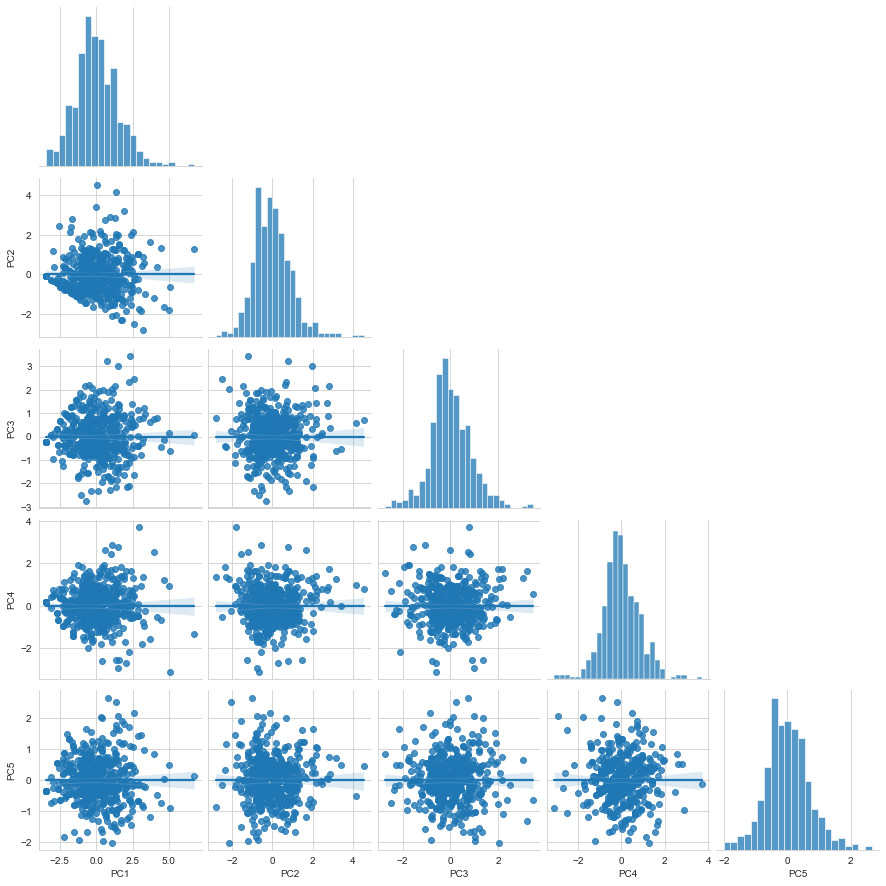

In [27]:
sns.pairplot(pd.DataFrame(Z_subjective, columns=['PC1','PC2','PC3','PC4','PC5']), kind='reg', corner=True);

---

### 6) Optional: How were the data transformed?

To demonstrate how the new principal component matrix is created from the original variable columns and the eigenvector weighting matrix, we'll create the first component (PC1) manually.

**6.A) Pull out the eigenvector for PC1.**

In [28]:
# Egenvector 5 component (We fix hyperparameter on model)
# PC1 (first component form PCA)
subjective_pca.components_[0]
confidence_weights = subjective_pca.components_[0] # PC1
confidence_weights

array([-0.50189394, -0.31528977, -0.46707122, -0.48386412, -0.44318711])

**6.B) Create a DataFrame showing the original values for the subjective variables for `person1`.**

In [29]:
# person 1
subjective.iloc[0,:] 
person1_original_ratings = subjective.iloc[0,:]
person1_original_ratings

subjective_attractiveness   -0.786472
subjective_sincerity        -0.202716
subjective_intelligence     -0.354194
subjective_fun               0.193323
subjective_ambition         -0.323589
Name: 0, dtype: float64

In [30]:
subjective

,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,-0.786472,-0.202716,-0.354194,0.193323,-0.323589
1,-0.066425,-2.329267,-0.354194,1.486916,-2.564932
2,0.653622,0.506135,0.564338,0.193323,0.236747
3,-0.066425,-0.202716,-1.272726,0.840119,0.236747
4,-0.786472,-3.746968,1.482870,-1.100270,0.236747
...,...,...,...,...,...
537,2.093717,1.214985,1.482870,1.486916,1.357419
538,-0.066425,1.214985,0.564338,0.193323,0.797083
539,-0.066425,-0.911566,-1.272726,-0.453474,-0.323589
540,-0.066425,-0.202716,-0.354194,-3.040659,-1.444260


In [31]:
# Create dataframe original values for the subjective variables for person1.
how_to_make_pc1 = pd.DataFrame({'person1_original': person1_original_ratings.values},
                               index=subjective.columns)
how_to_make_pc1

,person1_original
subjective_attractiveness,-0.786472
subjective_sincerity,-0.202716
subjective_intelligence,-0.354194
subjective_fun,0.193323
subjective_ambition,-0.323589


**6.C) Add the eigenvector for PC1: the weights by which to multiply each original variable.**

Recall that each component is a linear combination of the original variables, multiplied by a "weight" defined in the eigenvector of that component.

In [32]:
how_to_make_pc1['weights_to_make_pc1'] = confidence_weights
how_to_make_pc1

,person1_original,weights_to_make_pc1
subjective_attractiveness,-0.786472,-0.501894
subjective_sincerity,-0.202716,-0.315290
subjective_intelligence,-0.354194,-0.467071
subjective_fun,0.193323,-0.483864
subjective_ambition,-0.323589,-0.443187


**6.D) Multiply the original variable values by the eigenvector values.**

These are the "pieces" of PC1 that will be added together to create the new value for that person.

In [33]:
how_to_make_pc1['multiply_of_pc1_value'] = how_to_make_pc1["person1_original"] * how_to_make_pc1["weights_to_make_pc1"]
how_to_make_pc1

,person1_original,weights_to_make_pc1,multiply_of_pc1_value
subjective_attractiveness,-0.786472,-0.501894,0.394726
subjective_sincerity,-0.202716,-0.315290,0.063914
subjective_intelligence,-0.354194,-0.467071,0.165434
subjective_fun,0.193323,-0.483864,-0.093542
subjective_ambition,-0.323589,-0.443187,0.143410


**6.E) Sum the original values multiplied by the eigenvector weights to get `person1`’s value for PC1.**

In [34]:
# Sum the original values multiplied by the eigenvector weights
how_to_make_pc1["multiply_of_pc1_value"].sum()

0.673942000850367

In [35]:
# row 1 form PCA model after use transform()
Z_subjective[0,:][0]

0.673942000850367

---

### 7) Fit PCA on the preference data.

Now that you've seen how it's done, try it yourself!

- Find PCA eigenvalues and eigenvectors for the five `sd_like` columns.
- Transform the original `sd_like` columns into the principal component space.
- Verify that these columns are uncorrelated.

In [36]:
sd_like_pca = PCA(n_components=5)
sd_like_pca.fit(sd_like.values)

PCA(n_components=5)

#### 7.A) Find PCA eigenvalues and eigenvectors for the five `sd_like` columns.

In [37]:
# eigenvalues
sd_like_pca.components_

array([[ 0.62736939,  0.62167038, -0.2330427 , -0.33685671, -0.22836866],
       [-0.44611128, -0.17137686, -0.36194075, -0.44630599, -0.66439789],
       [-0.11063564, -0.08530062, -0.50180641, -0.49012362,  0.69889393],
       [ 0.62338705, -0.74294543, -0.20709265,  0.01934922, -0.12711771],
       [ 0.08087475, -0.15783472,  0.72110537, -0.66838834,  0.04256242]])

In [38]:
# eigenvectors
sd_like_pca.explained_variance_

array([11.81445156,  8.62194154,  4.81476322,  3.63861328,  1.97420378])

#### 7.B) Transform the original `sd_like` columns into the principal component space.

In [39]:
Z_like = sd_like_pca.transform(sd_like.values)

#### 7.C) Verify that these columns are uncorrelated.

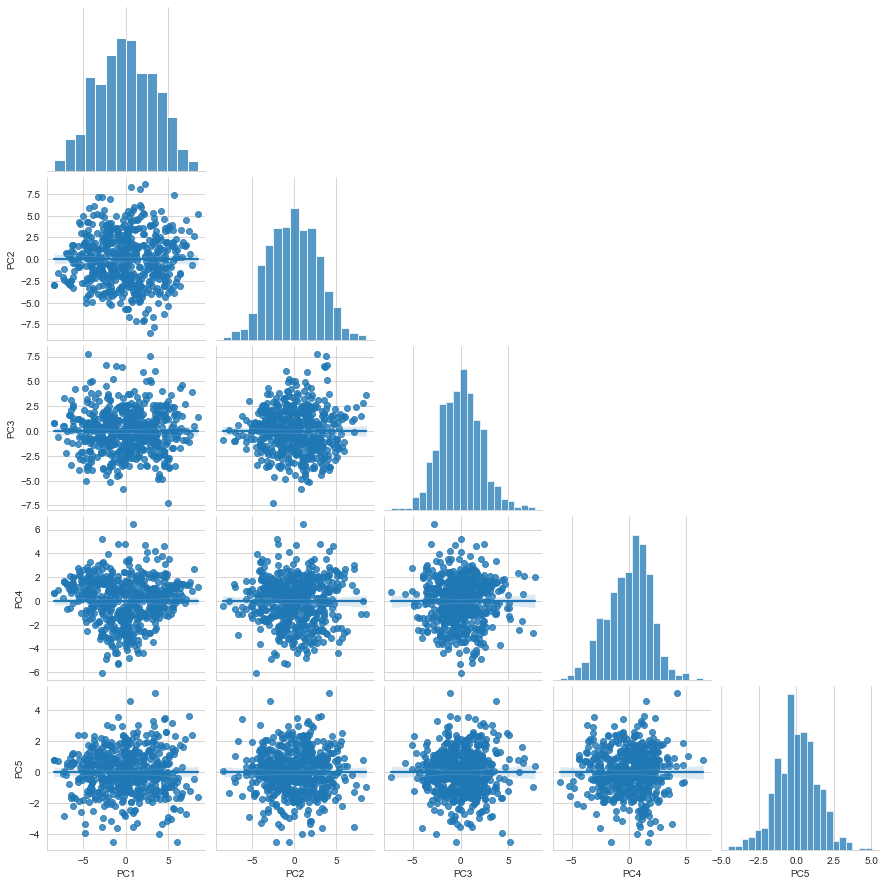

In [40]:
sns.pairplot(pd.DataFrame(Z_like, columns=['PC1','PC2','PC3','PC4','PC5']), kind='reg', corner=True);

---

### 8) Use PCA for dimensionality reduction.

Using linear regression, let's predict whether or not a user likes reading.

**The key question:** Can we get the same prediction accuracy using only the first three principal components as features versus using all five original values as features?

In [41]:
reading = sd['like_reading'].values

**8.A) Linear regression cross-validated on original variables (`sd_like.values`).**

- What is the mean cross-validation score?
- Keep in mind that linear regression uses $R^2$ for score, so one is the ideal score.

In [42]:
lr = LinearRegression()
original_scores = cross_val_score(lr, sd_like.values, reading, cv=5)
print(original_scores)
print(np.mean(original_scores))

[-0.00452896  0.13167438  0.02237835  0.17929338  0.13084444]
0.09193231749299209


**8.B) Linear regression on the first principal component.**

- What is the mean cross-validation score?

In [43]:
pca_lr = LinearRegression()
pca_scores = cross_val_score(pca_lr, Z_like[:,0:1], reading, cv=5)
print(pca_scores)
print(np.mean(pca_scores))

[-0.05826745  0.0942921  -0.0531123   0.05570881  0.03459837]
0.014643907426901203


**8.C) Linear regression on first three principal components.**

- What is the mean cross-validation score?

In [44]:
pca_lr = LinearRegression()
pca_scores = cross_val_score(pca_lr, Z_like[:,0:3], reading, cv=5)
print(pca_scores)
print(np.mean(pca_scores))

[-0.05205082  0.13209781  0.04510342  0.18249276  0.10163748]
0.08185612987574364


In [45]:
# mean cross-validation score original variables 0.09193231749299209 (original five-component)
# mean cross-validation score first principal components 0.014643907426901203
# mean cross-validation score first three principal components 0.08185612987574364 (first three PCA)

# We can reduce dimensionality(5 --> 3)
# there is reduce mean cross-validation score of original five-component ~ 1 % 
# but we use just first three principal components (3 axes of pca)

In [46]:
(0.09193231749299209 - 0.08185612987574364)*100

1.0076187617248447

---

**Check yourself**. The mean cross-validation score should be nearly the same for the first three principal components as it was on the original five-component data.

In [47]:
# Define X and y 
X = sd_like
y = sd['like_reading'].values

In [48]:
# Train before Test, X before y
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=42)

In [50]:
# Use only LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
# Score on training and testing sets.
print(f'Training Score: {round(lm.score(X_train, y_train),4)}')
print(f'Testing Score: {round(lm.score(X_test, y_test),4)}')

Training Score: 0.18
Testing Score: 0.066


In [51]:
# StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
x_test = ss.transform(X_test)

In [52]:
# Instantiate linear regression model
lm = LinearRegression()

# Instantiate PCA model
pca = PCA(n_components=5)
pca.fit(X_train)

# Transform Z_train and Z_test.
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)

# Fit on Z_train first three principal components
lm.fit(Z_train[:,0:3], y_train)

# Score on training and testing sets.
print(f'Training Score: {round(lm.score(Z_train[:,0:3], y_train),4)}')
print(f'Testing Score: {round(lm.score(Z_test[:,0:3], y_test),4)}')

Training Score: 0.1602
Testing Score: -2.1467


In [ ]:
# Form accuracy score fo model is very low 
# a speed dater likes reading not relate based on the dater's other likes

# Even if we reduce dimention by but the score is not good 
# The dataset should recollect 
# or add other features to predict 'like_reading'